### What is the most optimal skill to learn for Data Analyst

In [1]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

c:\Users\Richa Tripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_da_india=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='India')].copy()

In [11]:
df_da_india=df_da_india.dropna(subset=['salary_year_avg'])
df_da_india_exploed=df_da_india.explode('job_skills')
df_da_india_exploed[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [19]:
df_da_skills=df_da_india_exploed.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skills=df_da_skills.rename(columns={'count':'skill_count','median':'median_salary'})
da_job_count=len(df_da_india)
df_da_skills['skills_percent']=df_da_skills['skill_count']/da_job_count*100
df_da_skills

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
unify,1,79200.0,1.063830
unreal,1,105650.0,1.063830
visio,1,119250.0,1.063830


In [21]:
# we don't want to plot all the skills , we will choose optimal skill means the skills which have higher percent
skill_percent=10
df_da_skills_high_demand=df_da_skills[df_da_skills['skills_percent']>skill_percent]
df_da_skills_high_demand




,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [ ]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [45]:
df_technology=df['job_type_skills'].copy()
# remove duplicates
df_technology=df_technology.drop_duplicates()
# remove NAN values
df_technology=df_technology.dropna()

# combine all dictionaries into one
technology_dict={}
for row in df_technology:
    row_dict=ast.literal_eval(row)   # convert string to dictionary
    for key,value in row_dict.items():
        if key in technology_dict:        # if key already exists in technology_dict, add value to existing
            technology_dict[key]+=value
        else:                             # if key doesn't exist in technology_dict, ad key and value
            technology_dict[key]=value

# remove duplicates by converting values to set them back to list
for key,value in technology_dict.items():
    technology_dict[key]=  list(set(value))

technology_dict


{'analyst_tools': ['ms access',
  'powerpoint',
  'microstrategy',
  'esquisse',
  'qlik',
  'ssrs',
  'sharepoint',
  'sas',
  'spreadsheet',
  'excel',
  'sheets',
  'powerbi',
  'visio',
  'word',
  'msaccess',
  'power bi',
  'tableau',
  'alteryx',
  'spss',
  'looker',
  'datarobot',
  'cognos',
  'dax',
  'ssis',
  'nuix',
  'sap',
  'splunk',
  'outlook'],
 'programming': ['matlab',
  'elixir',
  'java',
  'kotlin',
  't-sql',
  'c',
  'delphi',
  'erlang',
  'scala',
  'mongo',
  'dart',
  'c++',
  'clojure',
  'bash',
  'no-sql',
  'powershell',
  'lua',
  'javascript',
  'shell',
  'sas',
  'pascal',
  'golang',
  'visual basic',
  'solidity',
  'r',
  'typescript',
  'haskell',
  'crystal',
  'objective-c',
  'perl',
  'ruby',
  'vba',
  'vb.net',
  'sass',
  'rust',
  'groovy',
  'nosql',
  'mongodb',
  'php',
  'sql',
  'python',
  'c#',
  'swift',
  'ocaml',
  'html',
  'lisp',
  'f#',
  'fortran',
  'go',
  'assembly',
  'apl',
  'css',
  'cobol',
  'visualbasic',
  'ju

In [49]:
df_technology=pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
df_technology=df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,powerpoint
0,analyst_tools,microstrategy
0,analyst_tools,esquisse
0,analyst_tools,qlik
...,...,...
9,sync,slack
9,sync,rocketchat
9,sync,twilio
9,sync,google chat


In [51]:
df_plot=df_da_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

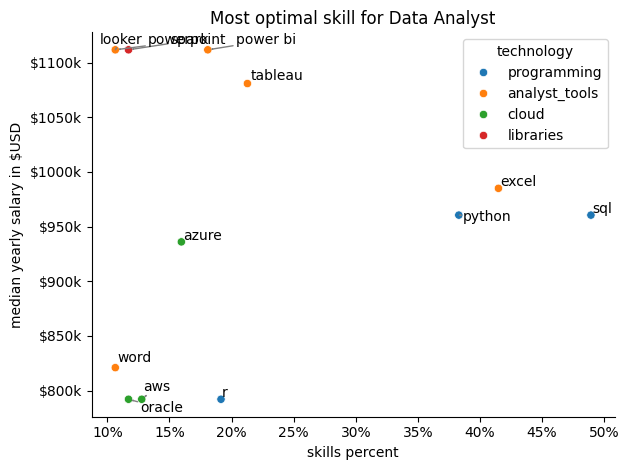

In [56]:
# to formate the y axis and adjust the annotations
from adjustText import adjust_text
from matplotlib.patches import ArrowStyle
from matplotlib.pyplot import gca

#df_plot.plot(kind='scatter',x='skills_percent',y='median_salary')
sns.scatterplot(
data=df_plot,
x='skills_percent',
y='median_salary',
hue='technology'
)
sns.despine()
plt.xlabel('skills percent')
plt.ylabel('median yearly salary in $USD')
plt.title('Most optimal skill for Data Analyst')
# but there is no annotation for skill set so we will use plt.text()
texts=[]

for i,txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skills_percent'].iloc[i],df_da_skills_high_demand['median_salary'].iloc[i],txt,fontsize=10))

from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/100)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# adjust text to avoid overlap
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.tight_layout()
plt.show()